# Intial setup
 * The followling block code is to setup our project 


In [0]:
from google.colab import drive
drive.mount('/content/drive')
PARKINSON_DATA="/content/drive/My Drive/Colab Notebooks/Data Sets/parkinsons.data"
SONAR_DATA="/content/drive/My Drive/Colab Notebooks/Data Sets/sonar.all-data"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Start of the Project

In [0]:
# Importing libaries that we need for the project 
import os 
import pandas as pd 
import numpy as np 


# Parkinsons Disease Data Set

## Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

 The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.


## Attribute Information:

### Matrix column entries (attributes):

| Attribute Name | Description |
| ------------------------------ | ------------- |
|name | ASCII subject name and recording number |
|MDVP:Fo(Hz) | Average vocal fundamental frequency |
|MDVP:Fhi(Hz) | Maximum vocal fundamental frequency |
|MDVP:Flo(Hz) | Minimum vocal fundamental frequency |
|MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP | Several measures of variation in fundamental frequency |
|MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA | Several measures of variation in amplitude |
|NHR,HNR | Two measures of ratio of noise to tonal components in the voice |
|status | Health status of the subject (one)  |
|RPDE,D2 | Two nonlinear dynamical complexity measures |
|DFA | Signal fractal scaling exponent |
|spread1,spread2,PPE | Three nonlinear measures of fundamental frequency variation  |



# Statistical Analysis on the Parkinsion disease data set

## Descriptive Statistics on the Parkisnon Disease data set

In [0]:
parkinsonDF=pd.read_csv(PARKINSON_DATA)
parkinsonDF.describe()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]

## Distrubution Analysis 

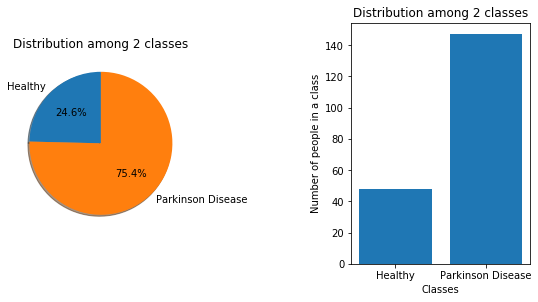

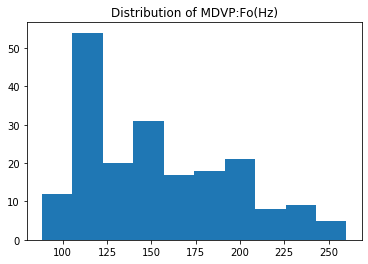

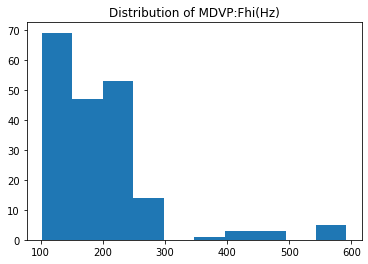

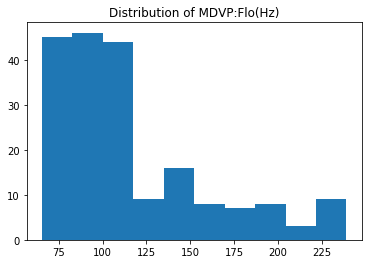

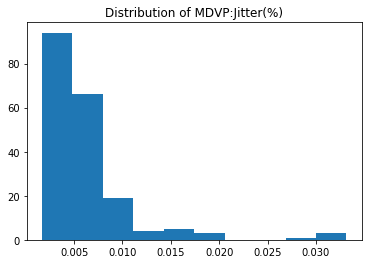

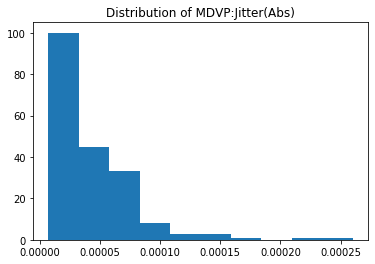

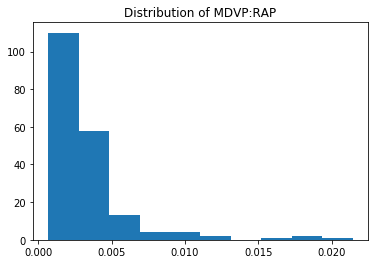

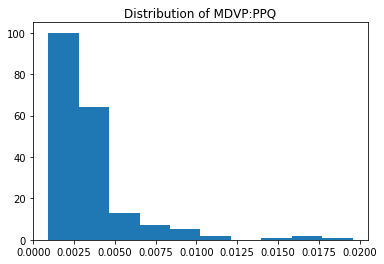

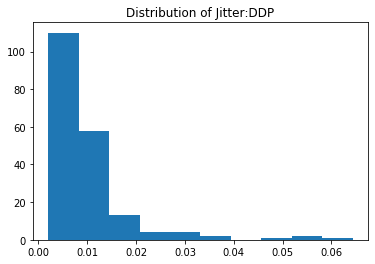

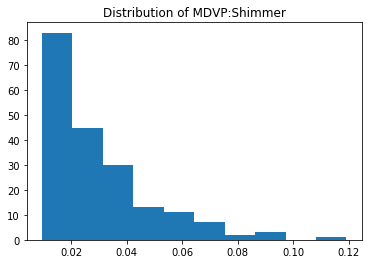

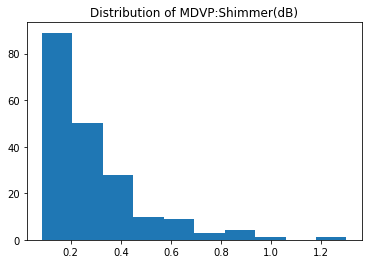

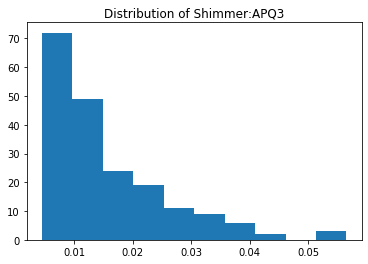

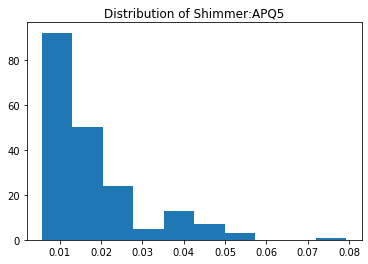

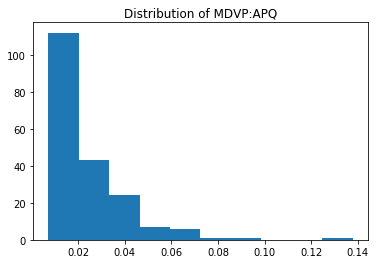

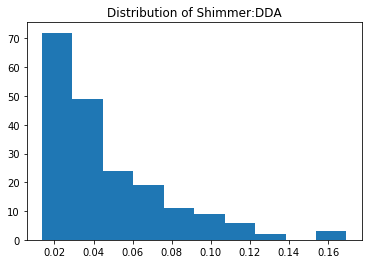

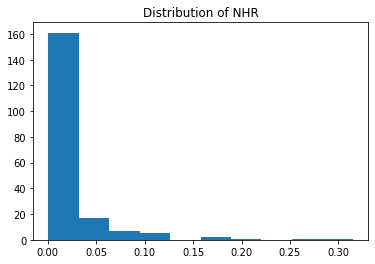

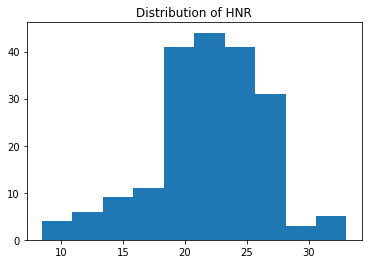

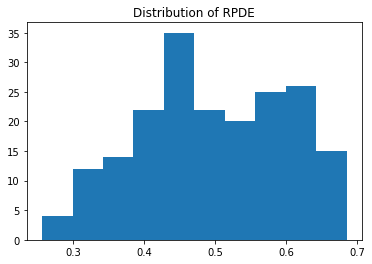

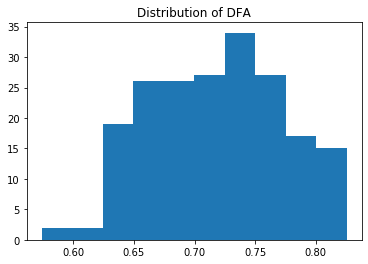

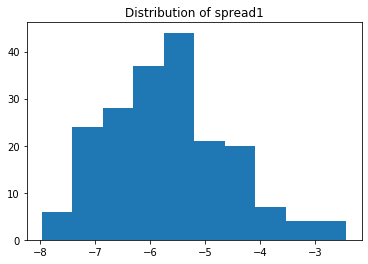

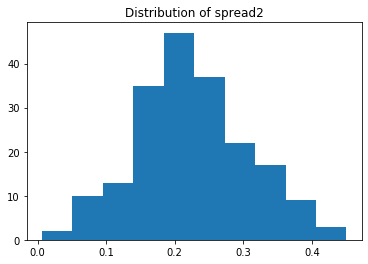

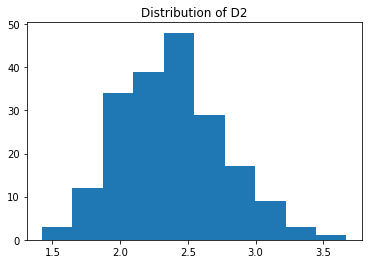

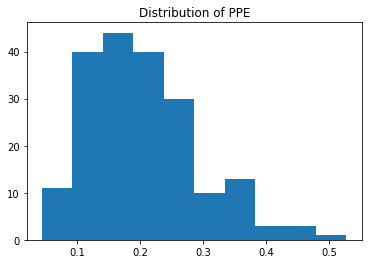

In [0]:
headers=[x for x in list(parkinsonDF) if x!='name' and x!='status']
# Pie chart
import matplotlib.pyplot as plt
numOfHealthy=parkinsonDF[(parkinsonDF.status==0)].status.count()
numOfPD=parkinsonDF[(parkinsonDF.status==1)].status.count()
labels = ['Healthy', 'Parkinson Disease']
values = [numOfHealthy,numOfPD]
fig, ax = plt.subplots(1,2,False)

ax[0].pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 # bar chart 
ax[1].bar(labels,values)
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Number of people in a class")
title="Distribution among 2 classes"
ax[0].set_title(title)
ax[1].set_title(title)
fig.tight_layout(pad=0, w_pad=0, h_pad=0)
fig.subplots_adjust(left=0.3, right=1.5,  wspace=0.9)

plt.show()
 

for header in headers: 
  plt.hist(parkinsonDF[header].tolist(),label=header)
  plt.title(f"Distribution of {header}")
 
  plt.show()
  

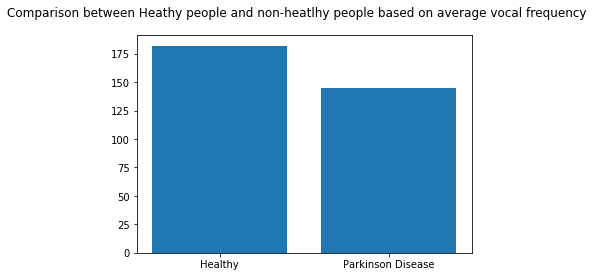

'\nheaders=[x for x in list(parkinsonDF) if x!=\'name\' and x!="spread1"]\nfor header in headers:\n  healthyDF=parkinsonDF[parkinsonDF["status"]==0][header].tolist()\n  sickDF=parkinsonDF[parkinsonDF["status"]==1][header].tolist()\n  barchart(healthyDF,sickDF,header)\n'

In [0]:
from statistics import mean 

healthyDF=parkinsonDF[parkinsonDF["status"]==0]["MDVP:Fo(Hz)"].tolist()
sickDF=parkinsonDF[parkinsonDF["status"]==1]["MDVP:Fo(Hz)"].tolist()
avgFreq=[mean(healthyDF),mean(sickDF)]
plt.bar(labels,avgFreq)
plt.suptitle('Comparison between Heathy people and non-heatlhy people based on average vocal frequency ')
plt.show()


def barchart(x,y,name):
  avgFreq=[mean(healthyDF),mean(sickDF)]
  plt.bar(labels,avgFreq)
  plt.suptitle(f'Comparison between Heathy people and non-heatlhy people based on {name} ')
  plt.show()

"""
headers=[x for x in list(parkinsonDF) if x!='name' and x!="spread1"]
for header in headers:
  healthyDF=parkinsonDF[parkinsonDF["status"]==0][header].tolist()
  sickDF=parkinsonDF[parkinsonDF["status"]==1][header].tolist()
  barchart(healthyDF,sickDF,header)
"""

# Comparision of distribution among the 2 classes 

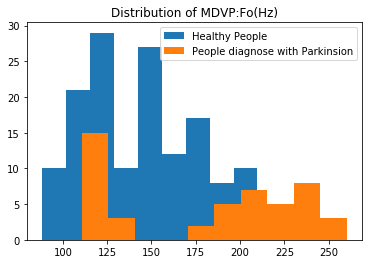

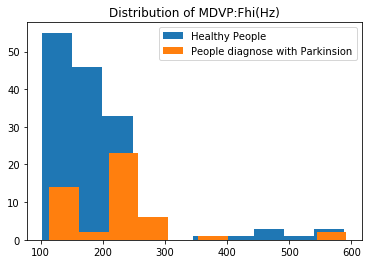

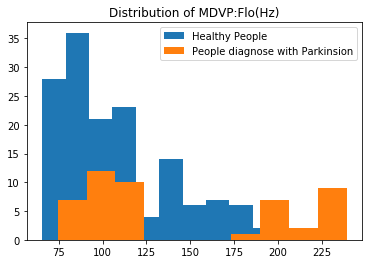

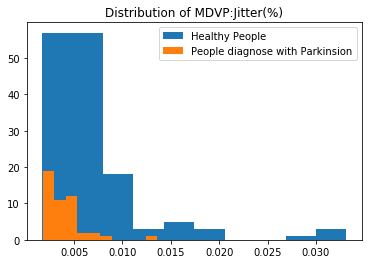

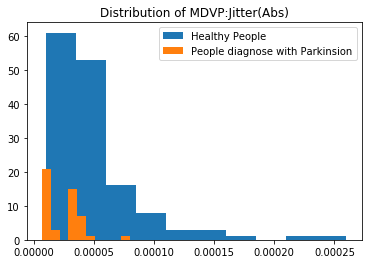

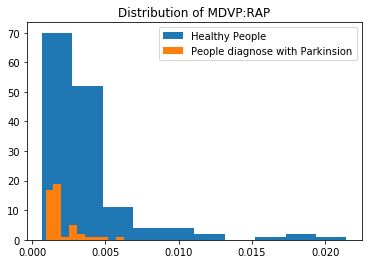

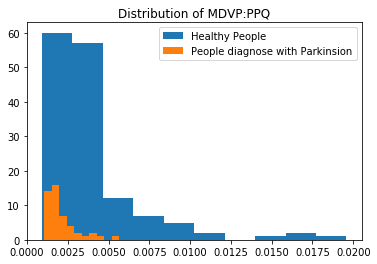

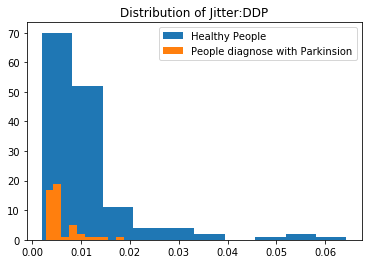

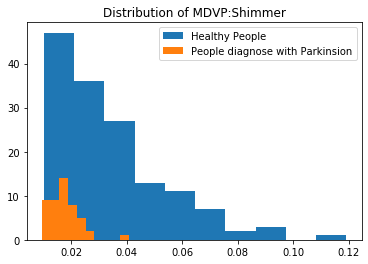

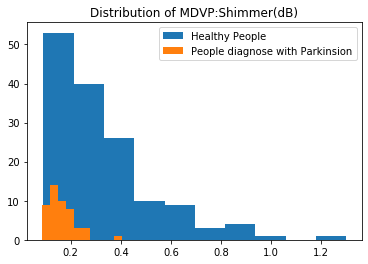

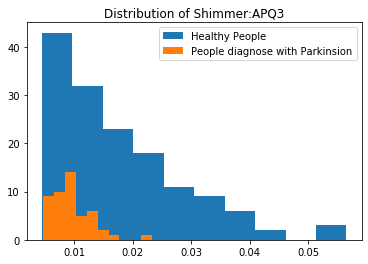

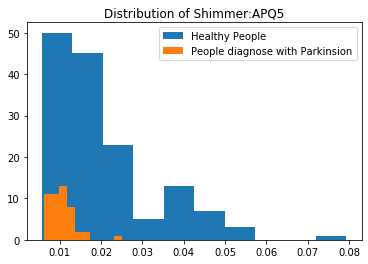

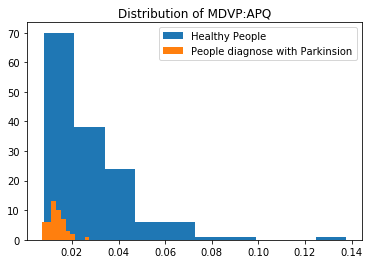

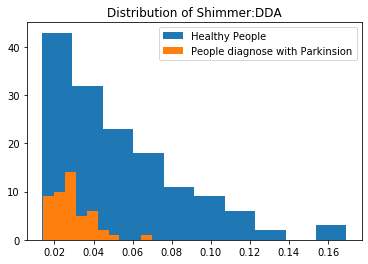

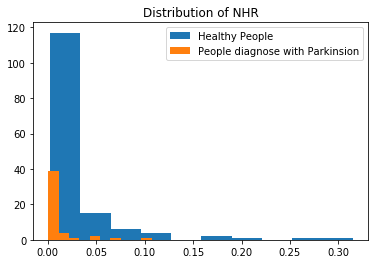

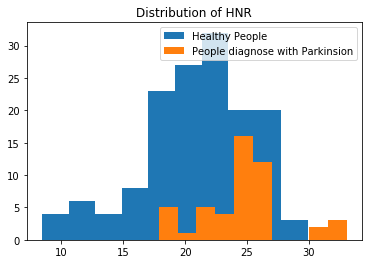

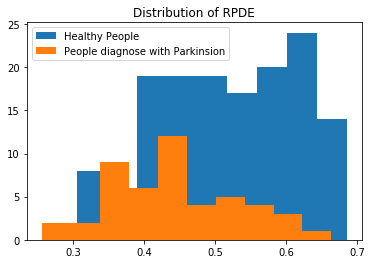

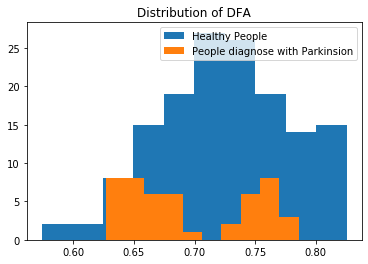

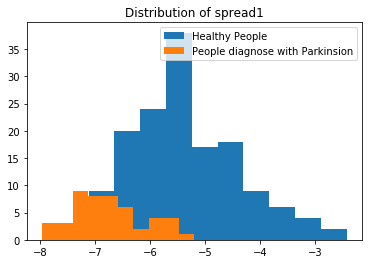

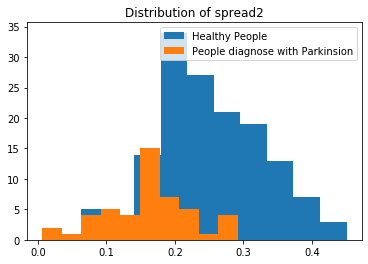

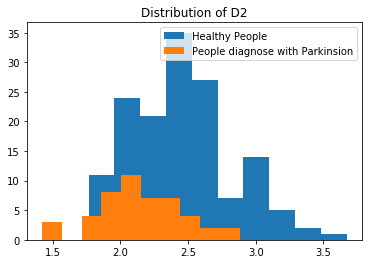

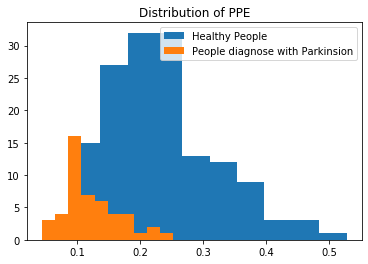

In [0]:

healthyPpl=parkinsonDF[(parkinsonDF.status==1)]
parkinsonPpl=parkinsonDF[(parkinsonDF.status==0)]

for header in headers: 
  plt.hist(healthyPpl[header].tolist(),label="Healthy People")
  plt.hist(parkinsonPpl[header].tolist(),label="People diagnose with Parkinsion")
  plt.legend()
  plt.title(f"Distribution of {header}")
 
  plt.show()

 # Sonar, Mines vs. Rocks Data Set

## SUMMARY: 
This is the data set used by Gorman and Sejnowski in their study
of the classification of sonar signals using a neural network [1].  The
task is to train a network to discriminate between sonar signals bounced
off a metal cylinder and those bounced off a roughly cylindrical rock.


## PROBLEM DESCRIPTION:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar
signals off a metal cylinder at various angles and under various
conditions.  The file "sonar.rocks" contains 97 patterns obtained from
rocks under similar conditions.  The transmitted sonar signal is a
frequency-modulated chirp, rising in frequency.  The data set contains
signals obtained from a variety of different aspect angles, spanning 90
degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number
represents the energy within a particular frequency band, integrated over
a certain period of time.  The integration aperture for higher frequencies
occur later in time, since these frequencies are transmitted later during
the chirp.

The label associated with each record contains the letter "R" if the object
is a rock and "M" if it is a mine (metal cylinder).  The numbers in the
labels are in increasing order of aspect angle, but they do not encode the
angle directly.





# Statiscial Analysis

In [0]:
numCols=61
names=[f"Feature {x}"for x in range(numCols)]
# Class we will try to classify  will be a mine 
sonarDF=pd.read_csv(SONAR_DATA,header=None , names=names)
convertValues=lambda a :1 if a == 'M' else 0
sonarDF[names[-1]]=[convertValues(label) for label in sonarDF[names[-1]]]
sonarDF.describe()


Feature 0   Feature 1   Feature 2  ...  Feature 58  Feature 59  Feature 60
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007941    0.006507    0.533654
std      0.022991    0.032960    0.038428  ...    0.006181    0.005031    0.500070
min      0.001500    0.000600    0.001500  ...    0.000100    0.000600    0.000000
25%      0.013350    0.016450    0.018950  ...    0.003675    0.003100    0.000000
50%      0.022800    0.030800    0.034300  ...    0.006400    0.005300    1.000000
75%      0.035550    0.047950    0.057950  ...    0.010325    0.008525    1.000000
max      0.137100    0.233900    0.305900  ...    0.036400    0.043900    1.000000

[8 rows x 61 columns]

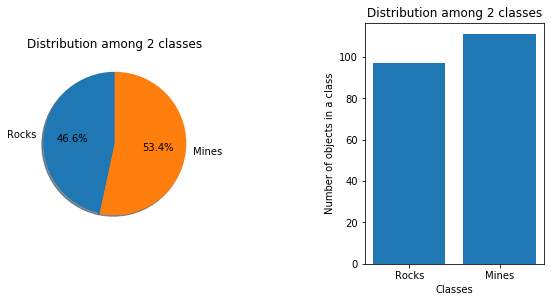

In [0]:

# Pie chart
import matplotlib.pyplot as plt
rocks=sonarDF[(sonarDF[names[-1]]==0)][names[-1]].count()
mines=sonarDF[(sonarDF[names[-1]]==1)][names[-1]].count()
labels = ['Rocks', 'Mines']
values = [rocks,mines]
fig, ax = plt.subplots(1,2,False)

ax[0].pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 # bar chart 
ax[1].bar(labels,values)
ax[1].set_xlabel("Classes")
ax[1].set_ylabel("Number of objects in a class")
title="Distribution among 2 classes"
ax[0].set_title(title)
ax[1].set_title(title)
fig.tight_layout(pad=0, w_pad=0, h_pad=0)
fig.subplots_adjust(left=0.3, right=1.5,  wspace=0.9)

plt.show()
 


# Distribution Analysis

Distribution of Feature 0


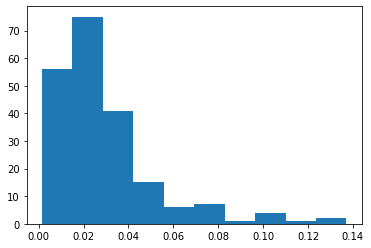

Distribution of Feature 1


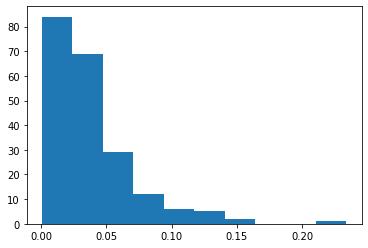

Distribution of Feature 2


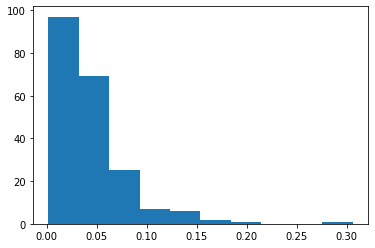

Distribution of Feature 3


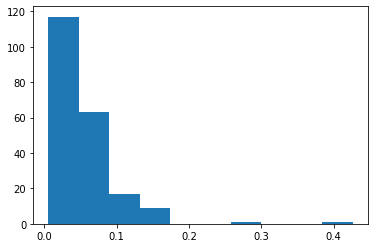

Distribution of Feature 4


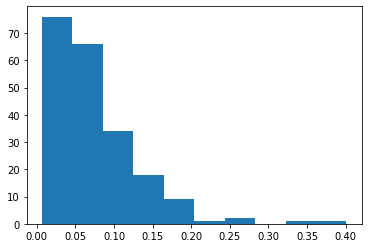

Distribution of Feature 5


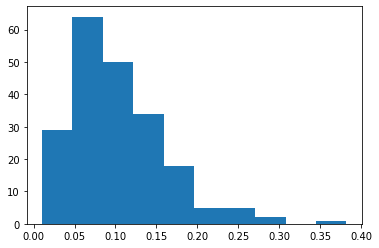

Distribution of Feature 6


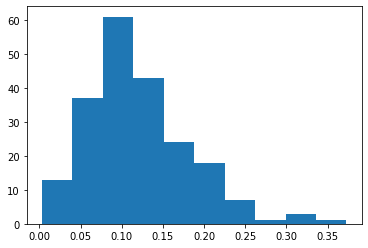

Distribution of Feature 7


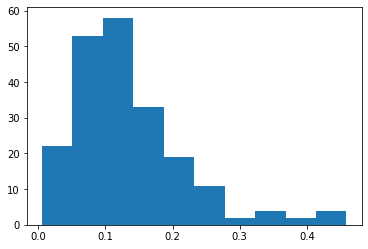

Distribution of Feature 8


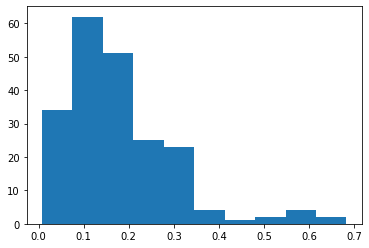

Distribution of Feature 9


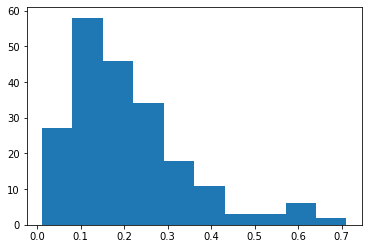

Distribution of Feature 10


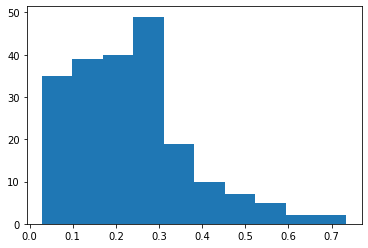

Distribution of Feature 11


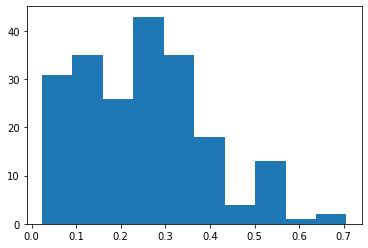

Distribution of Feature 12


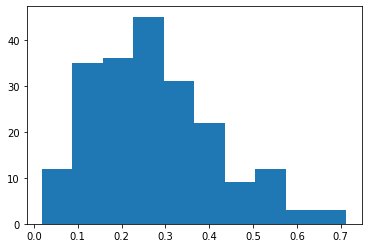

Distribution of Feature 13


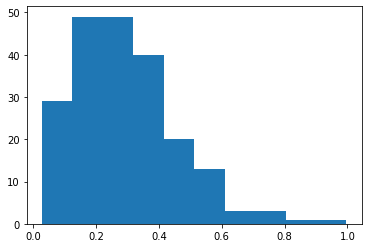

Distribution of Feature 14


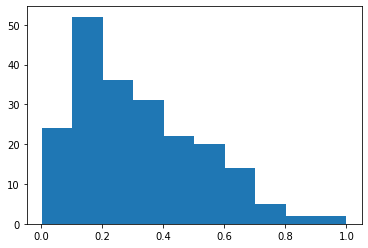

Distribution of Feature 15


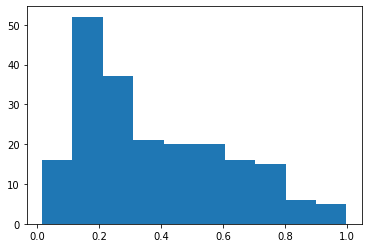

Distribution of Feature 16


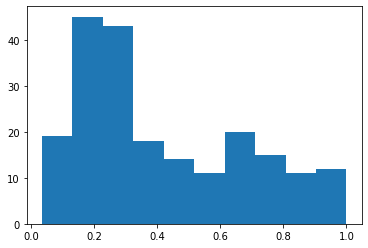

Distribution of Feature 17


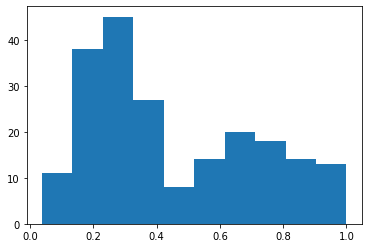

Distribution of Feature 18


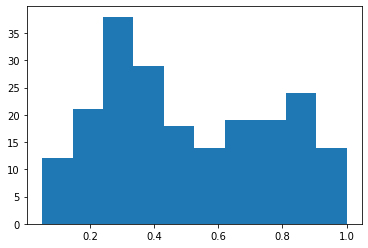

Distribution of Feature 19


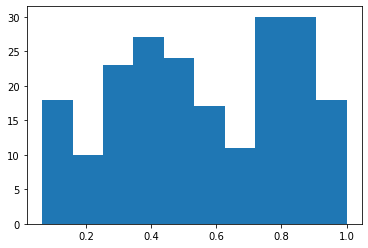

Distribution of Feature 20


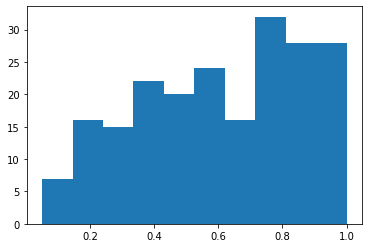

Distribution of Feature 21


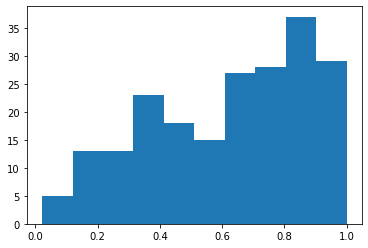

Distribution of Feature 22


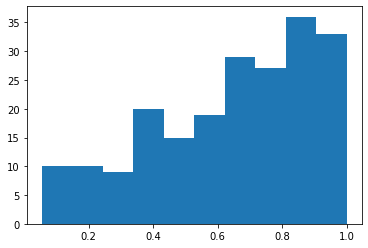

Distribution of Feature 23


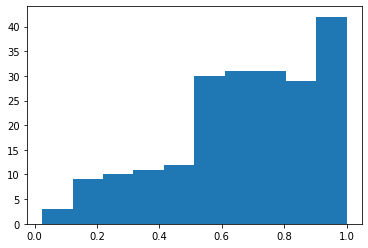

Distribution of Feature 24


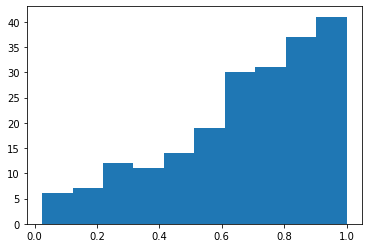

Distribution of Feature 25


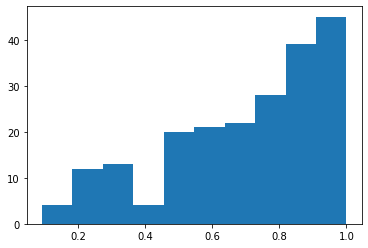

Distribution of Feature 26


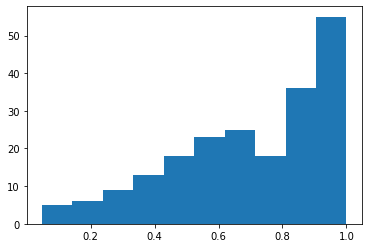

Distribution of Feature 27


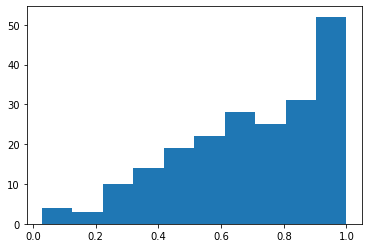

Distribution of Feature 28


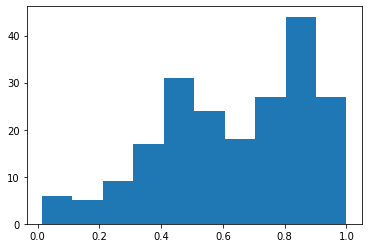

Distribution of Feature 29


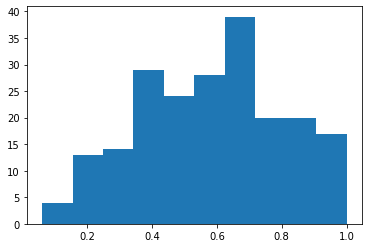

Distribution of Feature 30


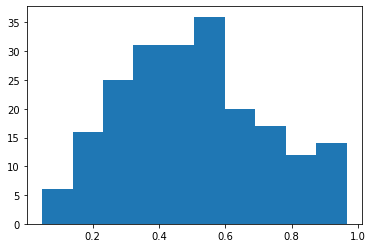

Distribution of Feature 31


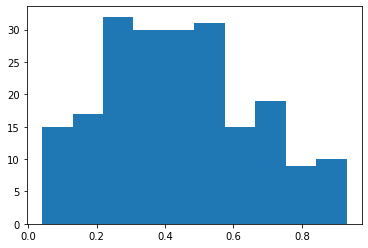

Distribution of Feature 32


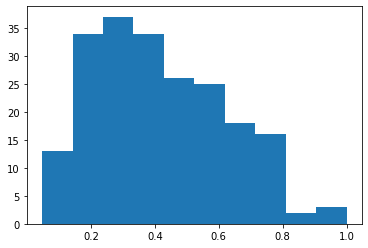

Distribution of Feature 33


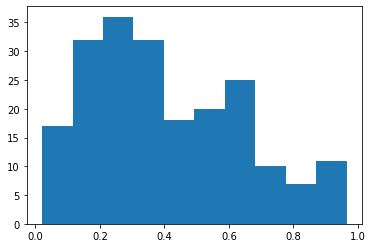

Distribution of Feature 34


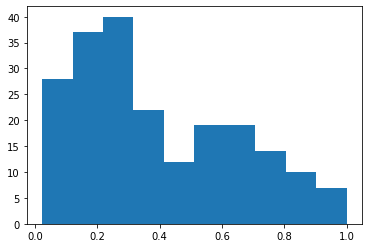

Distribution of Feature 35


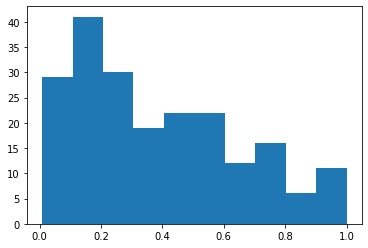

Distribution of Feature 36


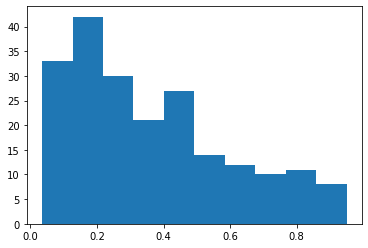

Distribution of Feature 37


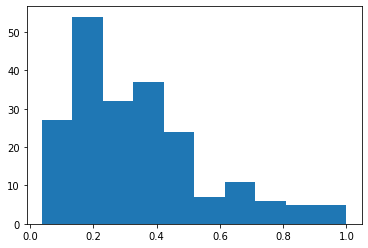

Distribution of Feature 38


Distribution of Feature 39


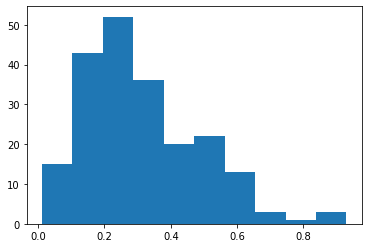

Distribution of Feature 40


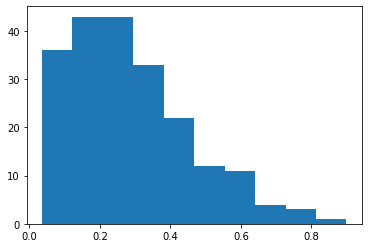

Distribution of Feature 41


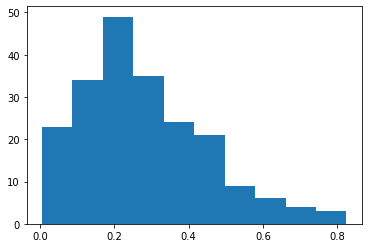

Distribution of Feature 42


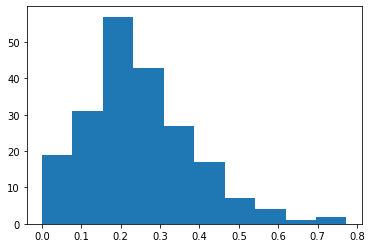

Distribution of Feature 43


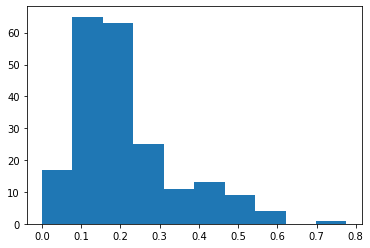

Distribution of Feature 44


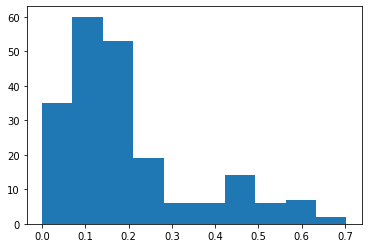

Distribution of Feature 45


Distribution of Feature 46


Distribution of Feature 47


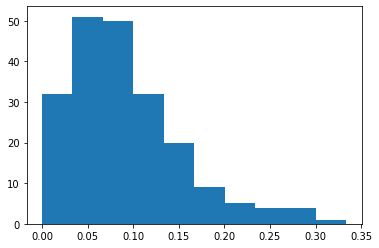

Distribution of Feature 48


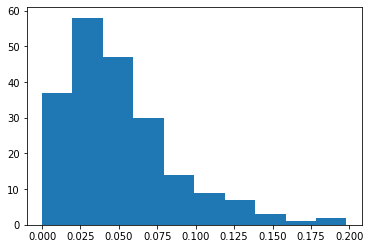

Distribution of Feature 49


Distribution of Feature 50


Distribution of Feature 51


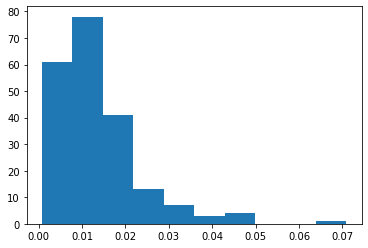

Distribution of Feature 52


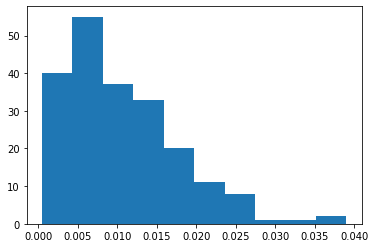

Distribution of Feature 53


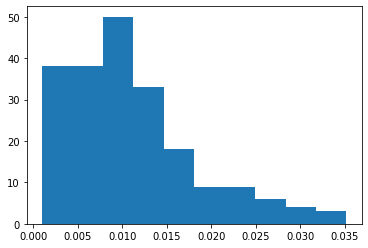

Distribution of Feature 54


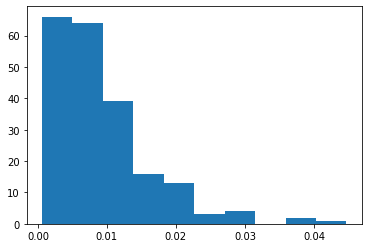

Distribution of Feature 55


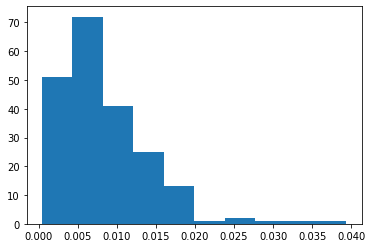

Distribution of Feature 56


Distribution of Feature 57


Distribution of Feature 58


Distribution of Feature 59


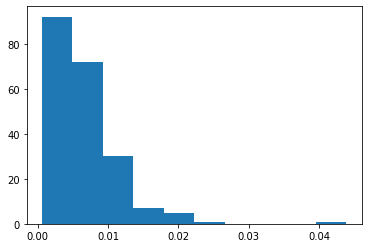

In [0]:
headers=[x for x in list(sonarDF) if x!='name' and x!=names[-1]]

for header in headers: 
  plt.hist(sonarDF[header].tolist(),label=header)
  print(f"Distribution of {header}")
  plt.show()
  

In [0]:
# Distribution among Rocks and Mines

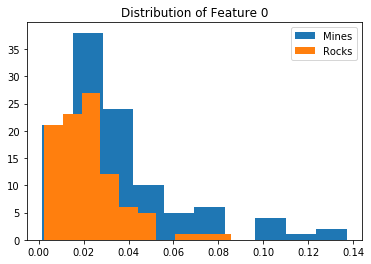

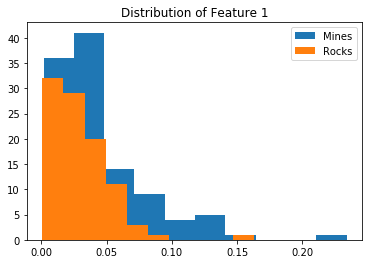

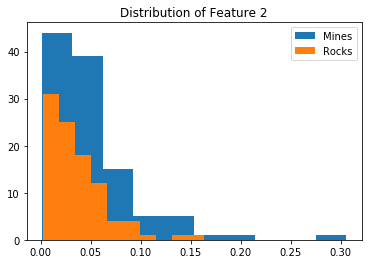

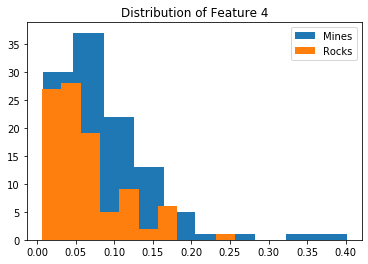

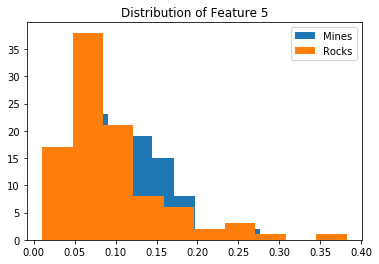

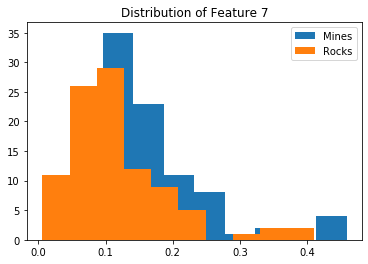

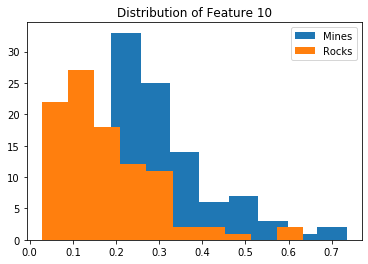

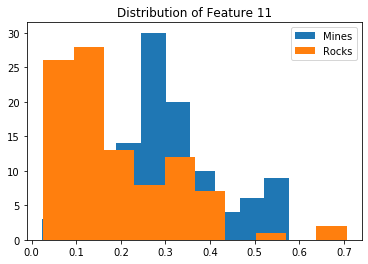

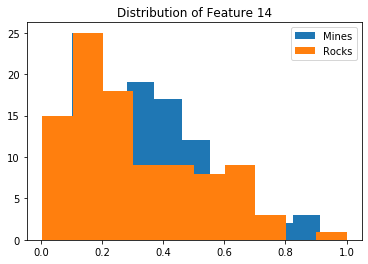

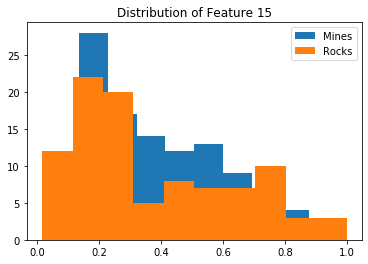

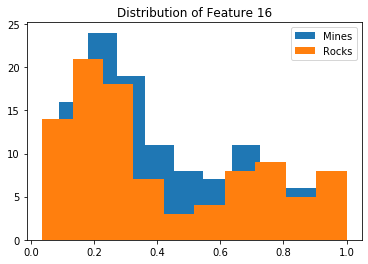

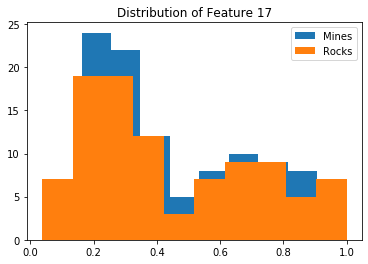

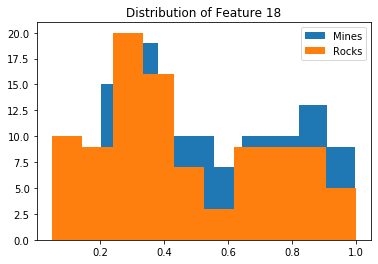

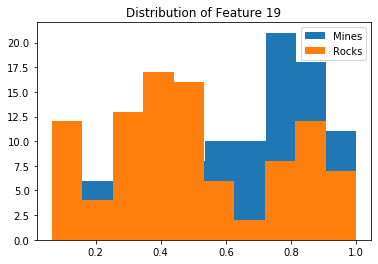

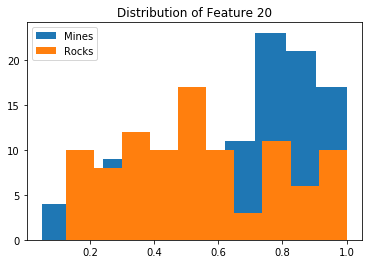

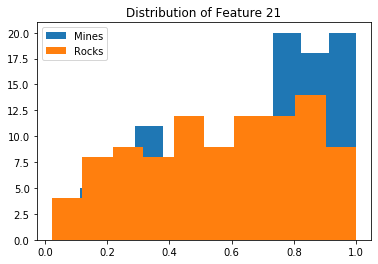

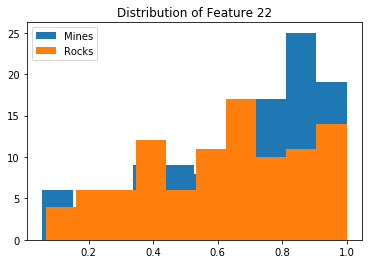

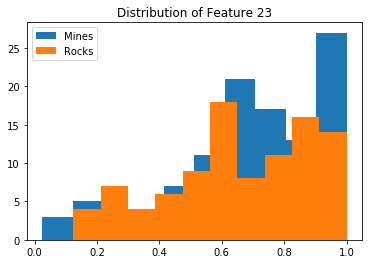

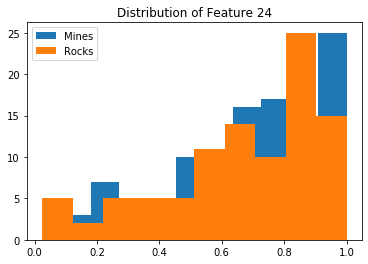

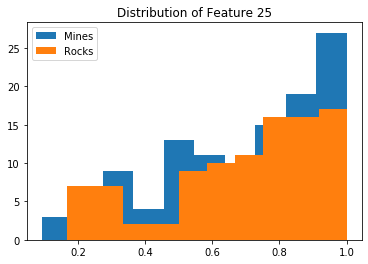

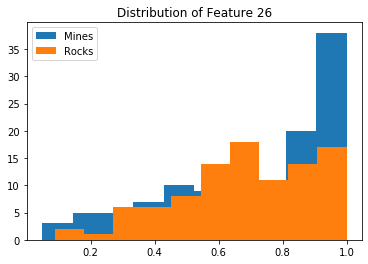

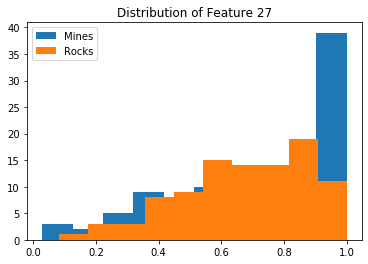

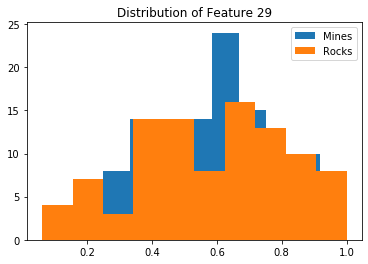

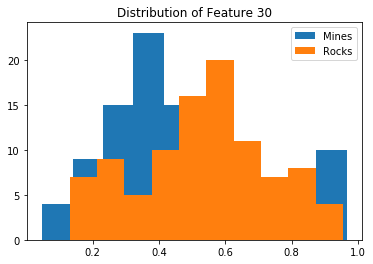

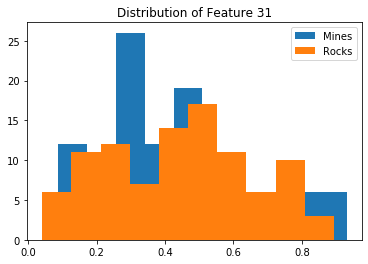

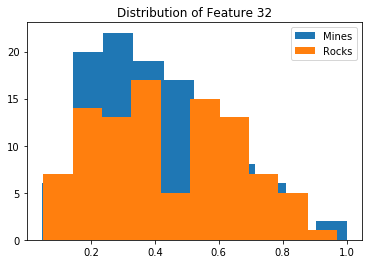

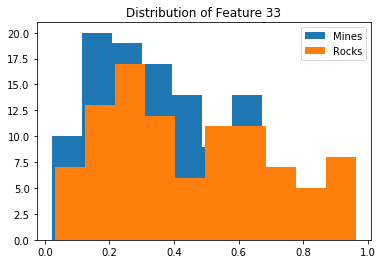

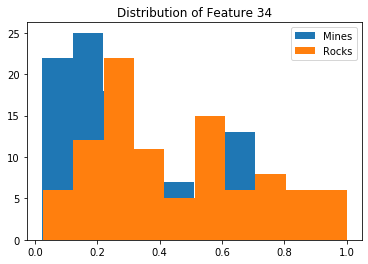

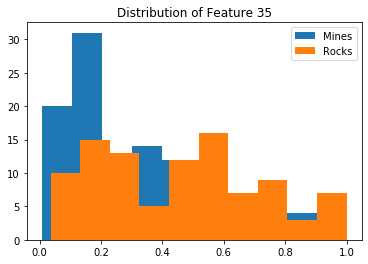

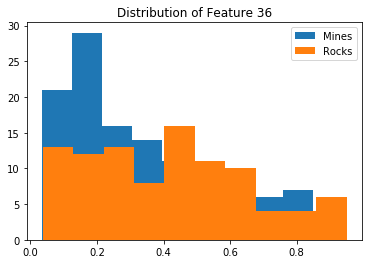

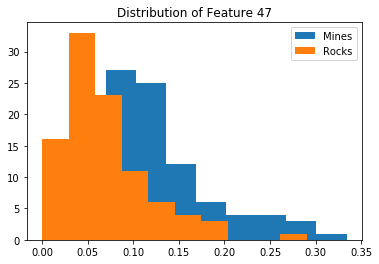

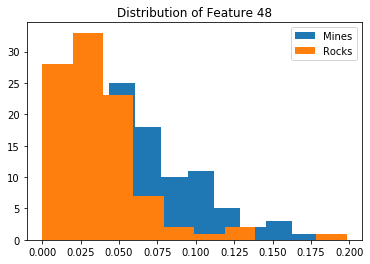

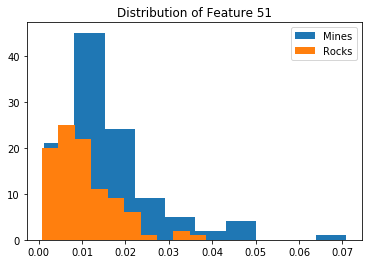

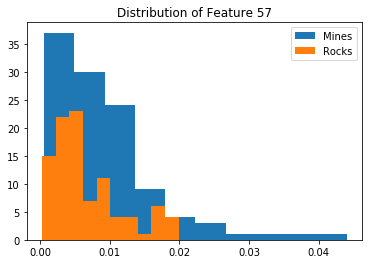

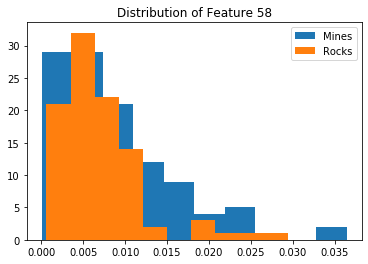

In [0]:

minesDF=sonarDF[(sonarDF[names[-1]]==1)]
rocksDF=sonarDF[(sonarDF[names[-1]]==0)]

for header in headers: 
  plt.hist(minesDF[header].tolist(),label="Mines")
  plt.hist(rocksDF[header].tolist(),label="Rocks")
  plt.legend()
  plt.title(f"Distribution of {header}")
 
  plt.show()